<a href="https://colab.research.google.com/github/arifduet/Machine-Learning-Project/blob/main/Image%20Classification%20using%20CNN%20and%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# data_path = '/content/drive/My Drive/Research Dataset/New Dataset'

file_path_train = '/content/drive/My Drive/csv file/mitbih_train.csv/mitbih_train.csv'
file_path_test = '/content/drive/My Drive/csv file/mitbih_test.csv/mitbih_test.csv'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
generator_train = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.0,
    dtype = None)



In [ ]:
train = generator_train.flow_from_directory('/content/drive/My Drive/csv file',
                                            target_size=(64,64),batch_size=64, class_mode="categorical", color_mode='rgb')




Found 816 images belonging to 5 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

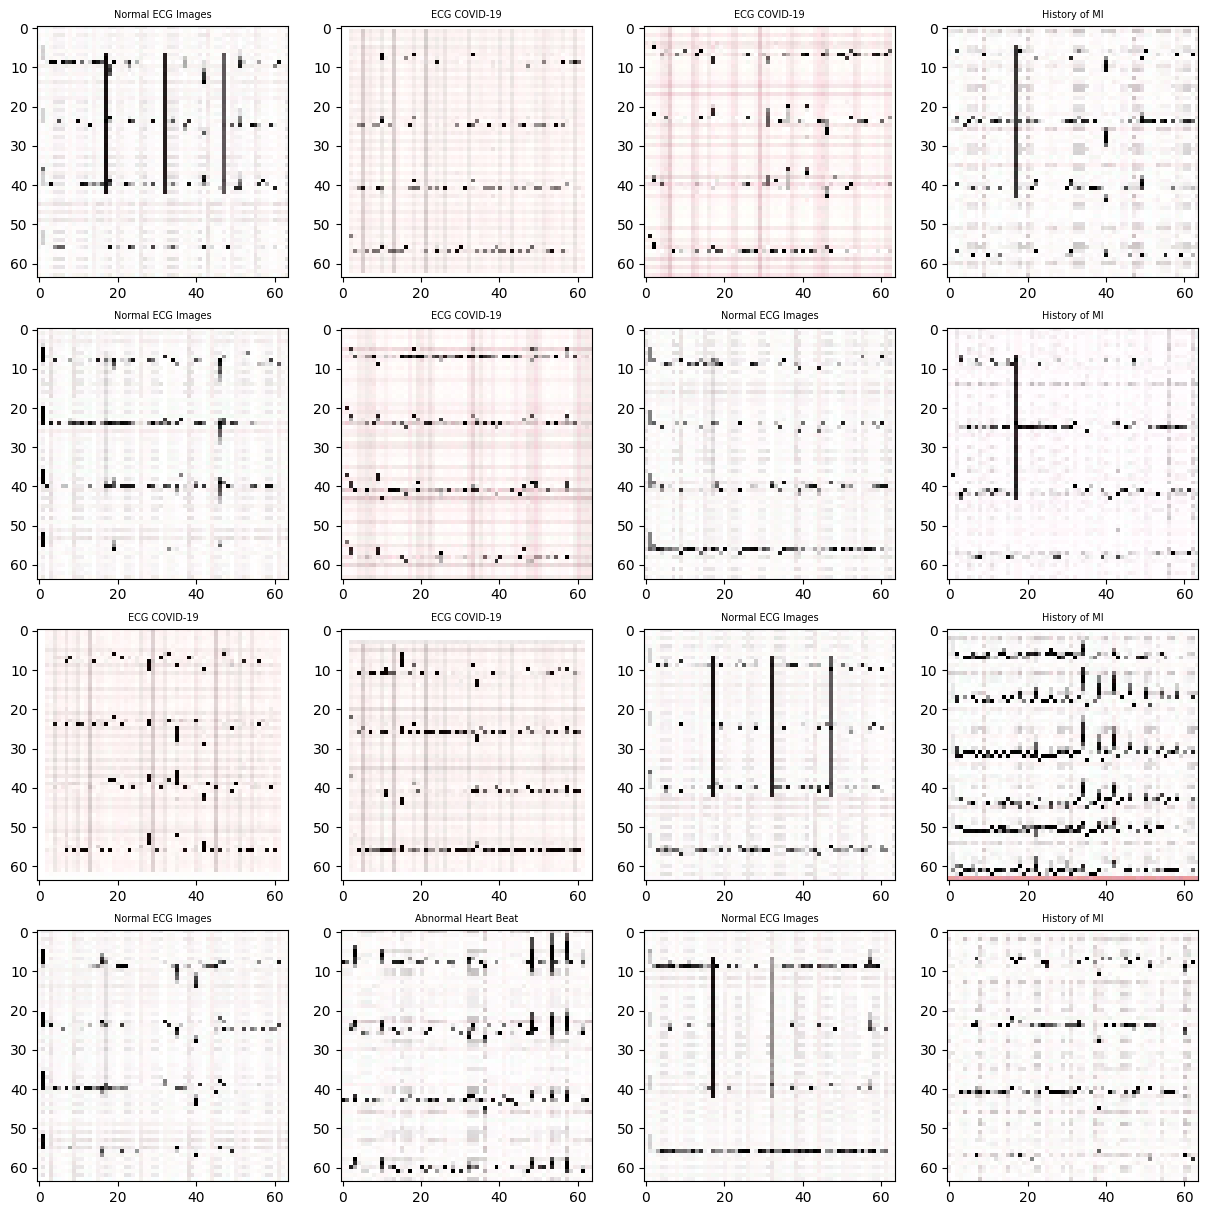

In [ ]:
class_dict = train.class_indices
classes = list(class_dict.keys())
images, labels = next(train)
plt.figure(figsize=(15,15))

for i in range(16):
  plt.subplot(4,4,i+1)
  image= images[i]
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name= classes[index]
  plt.title(class_name, color='k', fontsize=7)
plt.show()

In [ ]:
img_height,img_width=300,300
imput_shape=(300,300)
batch_size=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/Research Dataset/New Dataset',
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 816 files belonging to 5 classes.
Using 653 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/Research Dataset/New Dataset',
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 816 files belonging to 5 classes.
Using 163 files for validation.


In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras. optimizers import Adam

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(img_height,img_width,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(5,activation="softmax"))


NameError: name 'Dropout' is not defined

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=5
)

NameError: name 'model' is not defined

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

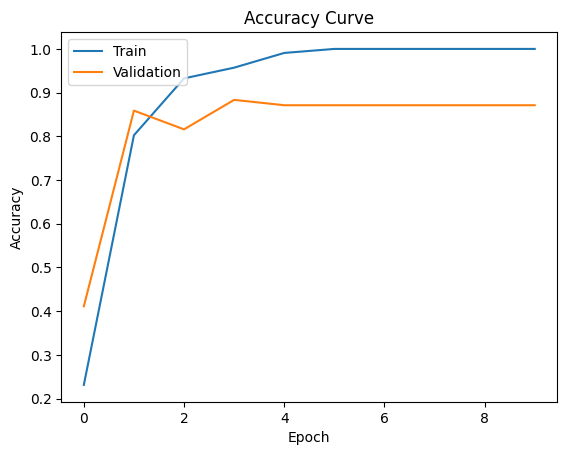

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


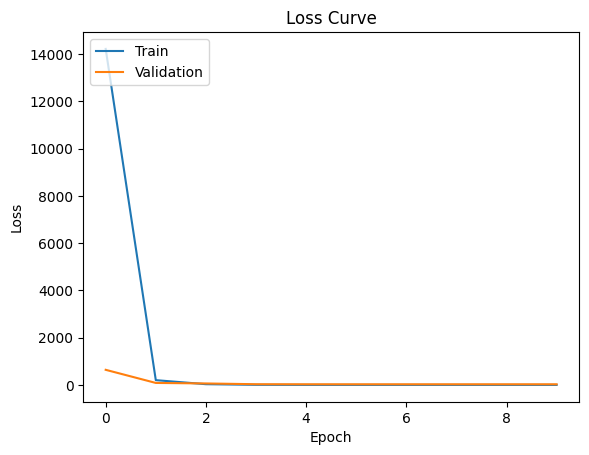

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pip install cm

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import random

1/1 [==============================] - 0s 37ms/step


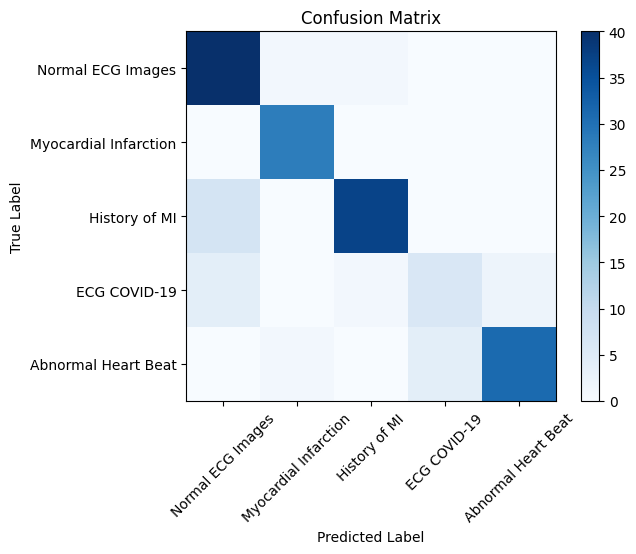

Precision: 0.8738
Recall: 0.8712
F1 Score: 0.8682


In [ ]:
true_labels = []
predicted_labels = []
for images, labels in val_ds:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Normal ECG Images','Myocardial Infarction','History of MI','ECG COVID-19','Abnormal Heart Beat']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')